In [1]:
import numpy as np
import sys
import warnings

sys.path.append("/workspaces/ood/")
%load_ext autoreload
%autoreload 2
warnings.filterwarnings("ignore")


from ood.ood_detection import isolation_forest_scores
from ood.draw import draw_score_distr_plot
from ood.ood_metrics import get_measures
from ood.utils import prettify_value, create_9_vs_1_cifar_emb

In [2]:
N_ESTIMATORS = 500
MAX_SAMPLES = 10000
MAX_FEATURES = 100
VERBOSE = 0

### 1) Softmax trained emb

In [3]:
model_name = "soft"
forest_scores_distr = isolation_forest_scores(
    in_distr_train_path=f"../data/predictions/{model_name}_cifar_train.npy",
    in_distr_test_path=f"../data/predictions/{model_name}_cifar_test.npy",
    out_distr_test_path=f"../data/predictions/{model_name}_svhn_test.npy",
    in_distr_ds_name="cifar",
    out_distr_ds_name="svhn",
    n_estimators=N_ESTIMATORS,
    max_samples=MAX_SAMPLES,
    max_features=MAX_FEATURES,
    verbose=VERBOSE,
    seed=42,
)

 soft softmax scores: 
 auroc 0.80368
 aupr  0.56663
 FPR95 0.58566


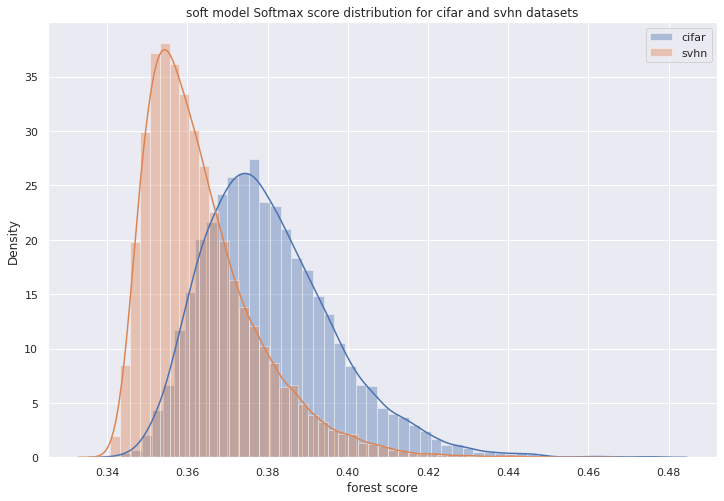

In [4]:
draw_score_distr_plot(
    scores_distr=forest_scores_distr,
    score_type="forest",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)

auroc, aupr, fpr = get_measures(
    forest_scores_distr["cifar"], forest_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

### 2) MoCo trained emb

In [5]:
model_name = "moco"
forest_scores_distr = isolation_forest_scores(
    in_distr_train_path=f"../data/predictions/{model_name}_cifar_train.npy",
    in_distr_test_path=f"../data/predictions/{model_name}_cifar_test.npy",
    out_distr_test_path=f"../data/predictions/{model_name}_svhn_test.npy",
    in_distr_ds_name="cifar",
    out_distr_ds_name="svhn",
    n_estimators=N_ESTIMATORS,
    max_samples=MAX_SAMPLES,
    max_features=MAX_FEATURES,
    verbose=VERBOSE,
    seed=42,
)

 moco softmax scores: 
 auroc 0.36814
 aupr  0.27655
 FPR95 0.99985


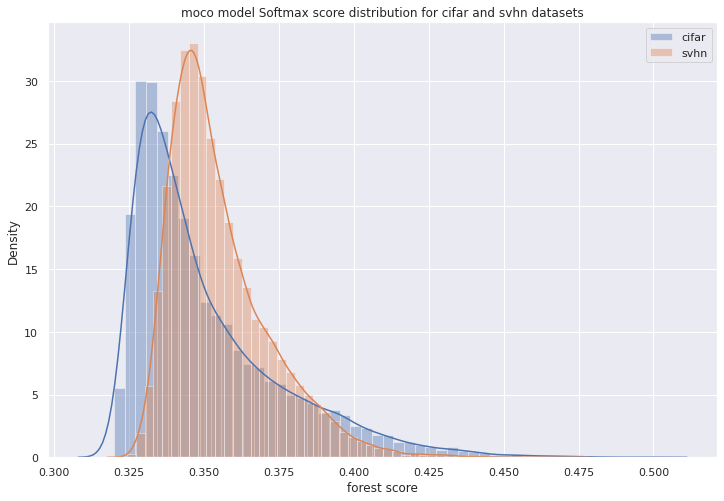

In [6]:
draw_score_distr_plot(
    scores_distr=forest_scores_distr,
    score_type="forest",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)

auroc, aupr, fpr = get_measures(
    forest_scores_distr["cifar"], forest_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

### 3) BYOL trained emb

In [7]:
model_name = "byol"
forest_scores_distr = isolation_forest_scores(
    in_distr_train_path=f"../data/predictions/{model_name}_cifar_train.npy",
    in_distr_test_path=f"../data/predictions/{model_name}_cifar_test.npy",
    out_distr_test_path=f"../data/predictions/{model_name}_svhn_test.npy",
    in_distr_ds_name="cifar",
    out_distr_ds_name="svhn",
    n_estimators=N_ESTIMATORS,
    max_samples=MAX_SAMPLES,
    max_features=MAX_FEATURES,
    verbose=VERBOSE,
    seed=42,
)

 byol softmax scores: 
 auroc 0.89720
 aupr  0.77443
 FPR95 0.41918


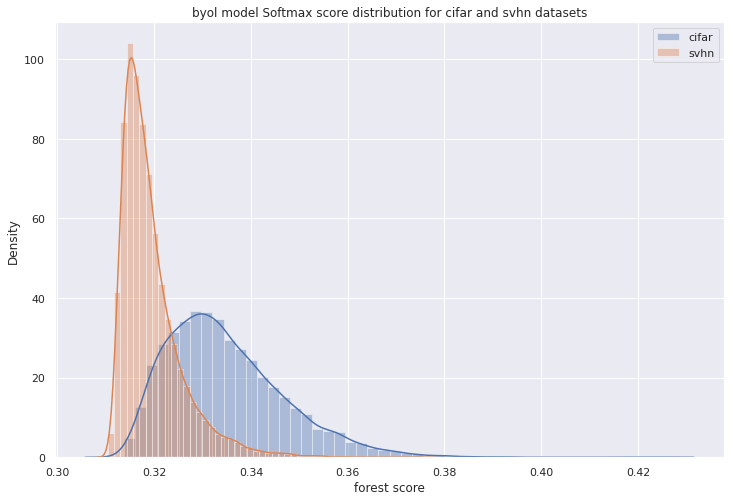

In [8]:
draw_score_distr_plot(
    scores_distr=forest_scores_distr,
    score_type="forest",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)

auroc, aupr, fpr = get_measures(
    forest_scores_distr["cifar"], forest_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

## Cifar10 9 vs 1 OOD detection

### 3) BYOL trained emb

#### vs car

In [9]:
model_name = "byol"
ood_label = 9
train_in_path, test_in_path, test_out_path = create_9_vs_1_cifar_emb(
    model_name=model_name, ood_label=ood_label
)

In [10]:
forest_scores_distr = isolation_forest_scores(
    in_distr_train_path=train_in_path,
    in_distr_test_path=test_in_path,
    out_distr_test_path=test_out_path,
    in_distr_ds_name=f"cifar without {ood_label}",
    out_distr_ds_name=f"cifar only {ood_label}",
    n_estimators=N_ESTIMATORS,
    max_samples=MAX_SAMPLES,
    max_features=MAX_FEATURES,
    verbose=VERBOSE,
    seed=42,
)

 byol softmax scores: 
 auroc 0.55764
 aupr  0.92025
 FPR95 0.96400


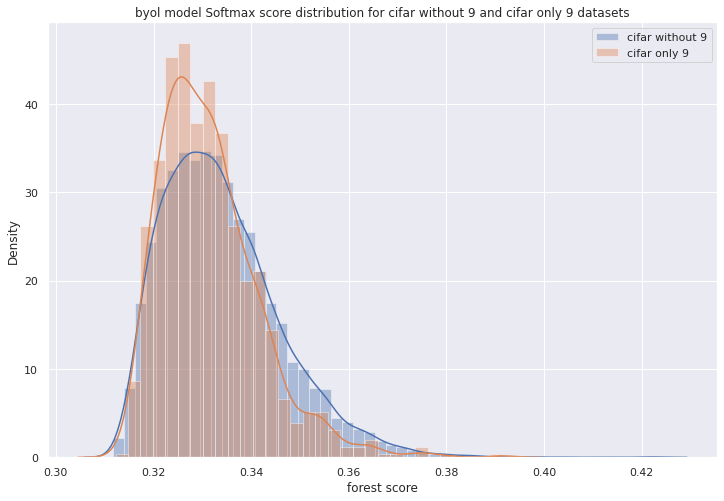

In [11]:
draw_score_distr_plot(
    scores_distr=forest_scores_distr,
    score_type="forest",
    model_name=model_name,
    in_data_name=f"cifar without {ood_label}",
    out_data_name=f"cifar only {ood_label}",
)

auroc, aupr, fpr = get_measures(
    forest_scores_distr[f"cifar without {ood_label}"],
    forest_scores_distr[f"cifar only {ood_label}"],
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

### vs others

In [12]:
model_name = "byol"

for ood_label in range(10):
    train_in_path, test_in_path, test_out_path = create_9_vs_1_cifar_emb(
        model_name=model_name, ood_label=ood_label
    )

    forest_scores_distr = isolation_forest_scores(
        in_distr_train_path=train_in_path,
        in_distr_test_path=test_in_path,
        out_distr_test_path=test_out_path,
        in_distr_ds_name=f"cifar without {ood_label}",
        out_distr_ds_name=f"cifar only {ood_label}",
        n_estimators=N_ESTIMATORS,
        max_samples=MAX_SAMPLES,
        max_features=MAX_FEATURES,
        verbose=VERBOSE,
        seed=42,
    )

    auroc, aupr, fpr = get_measures(
        forest_scores_distr[f"cifar without {ood_label}"],
        forest_scores_distr[f"cifar only {ood_label}"],
    )
    auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)
    print(f"vs class {ood_label}:")
    print(
        f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}"
    )

vs class 0:
 byol softmax scores: 
 auroc 0.47588
 aupr  0.89601
 FPR95 0.96400
vs class 1:
 byol softmax scores: 
 auroc 0.49864
 aupr  0.90006
 FPR95 0.96200
vs class 2:
 byol softmax scores: 
 auroc 0.32673
 aupr  0.84625
 FPR95 0.98700
vs class 3:
 byol softmax scores: 
 auroc 0.38763
 aupr  0.86405
 FPR95 0.98600
vs class 4:
 byol softmax scores: 
 auroc 0.62293
 aupr  0.93176
 FPR95 0.88200
vs class 5:
 byol softmax scores: 
 auroc 0.25228
 aupr  0.81954
 FPR95 0.99900
vs class 6:
 byol softmax scores: 
 auroc 0.46030
 aupr  0.88870
 FPR95 0.96600
vs class 7:
 byol softmax scores: 
 auroc 0.37222
 aupr  0.86722
 FPR95 0.98500
vs class 8:
 byol softmax scores: 
 auroc 0.54690
 aupr  0.91530
 FPR95 0.95600
vs class 9:
 byol softmax scores: 
 auroc 0.55764
 aupr  0.92025
 FPR95 0.96400
